## Importação

In [ ]:
# Importa os arquivos necessários
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import backend
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import timeit
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import *

In [ ]:
# Carregar o dataframe
itapa_df = pd.read_csv("https://raw.githubusercontent.com/RF3758/K37PjOgE53/main/INMET_NE_BA_A446_ITAPETINGA_01-01-2014_A_08-04-2019_ALTERADO.csv", sep=';', encoding = 'ISO-8859-1',decimal=',',index_col=False)

## Informações do dataframe

In [ ]:
itapa_df.info()
itapa_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46176 entries, 0 to 46175
Data columns (total 24 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Ano                                                    46176 non-null  int64  
 1   Mês                                                    46176 non-null  int64  
 2   Dia                                                    46176 non-null  int64  
 3   Hora UTC                                               46176 non-null  int64  
 4   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       41841 non-null  float64
 5   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  45013 non-null  float64
 6   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        44994 non-null  float64
 7   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       44994 non-null  float64
 8   RADIACAO GLOBAL (W/m²)                        

Ano                                                          0
Mês                                                          0
Dia                                                          0
Hora UTC                                                     0
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                          4335
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)     1163
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)           1182
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)          1182
RADIACAO GLOBAL (W/m²)                                   22751
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)              1163
TEMPERATURA DO PONTO DE ORVALHO (°C)                      1163
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)                1182
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)                1182
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)          1182
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)          1182
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               

In [ ]:
itapa_df.describe()

,Ano,Mês,Dia,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (W/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",LATITUDE,LONGITUDE,ALTITUDE
count,46176.000000,46176.000000,46176.000000,46176.000000,41841.000000,45013.000000,44994.000000,44994.000000,23425.000000,45013.000000,45013.000000,44994.000000,44994.000000,44994.000000,44994.000000,44994.000000,44994.000000,45013.000000,45012.000000,44984.000000,45012.000000,4.617600e+04,4.617600e+04,46176.0
mean,2016.152807,6.301455,15.672037,11.500000,0.072819,984.230876,984.497440,983.961826,1436.841272,24.494437,17.966456,25.182200,23.870103,18.468074,17.488005,72.774548,67.242966,70.055806,130.987670,4.931418,2.200102,-1.524472e+01,-4.022944e+01,269.0
std,1.527157,3.500495,8.807991,6.922262,0.652200,3.384321,3.356393,3.398861,1077.535087,4.238162,2.245133,4.494144,3.998980,2.152166,2.362086,17.198895,19.033639,18.204637,88.910978,2.585764,1.380911,1.010225e-11,1.927013e-11,0.0
min,2014.000000,1.000000,1.000000,0.000000,0.000000,972.500000,972.700000,972.300000,0.000000,10.800000,6.300000,11.500000,10.800000,7.700000,2.800000,17.000000,13.000000,16.000000,1.000000,0.600000,0.100000,-1.524472e+01,-4.022944e+01,269.0
25%,2015.000000,3.000000,8.000000,5.750000,0.000000,982.000000,982.200000,981.700000,447.600000,21.500000,16.600000,21.900000,21.100000,17.200000,16.100000,61.000000,52.000000,57.000000,66.000000,2.700000,1.100000,-1.524472e+01,-4.022944e+01,269.0
50%,2016.000000,6.000000,16.000000,11.500000,0.000000,984.000000,984.300000,983.800000,1347.300000,23.800000,18.300000,24.400000,23.300000,18.800000,17.900000,77.000000,71.000000,74.000000,103.000000,4.600000,1.900000,-1.524472e+01,-4.022944e+01,269.0
75%,2017.000000,9.000000,23.000000,17.250000,0.000000,986.500000,986.700000,986.200000,2272.300000,27.300000,19.600000,28.300000,26.400000,20.000000,19.200000,87.000000,84.000000,86.000000,161.000000,6.800000,3.000000,-1.524472e+01,-4.022944e+01,269.0
max,2019.000000,12.000000,31.000000,23.000000,40.800000,996.200000,996.300000,996.000000,4412.800000,39.800000,23.900000,40.300000,38.600000,25.700000,23.200000,95.000000,95.000000,95.000000,360.000000,20.800000,9.500000,-1.524472e+01,-4.022944e+01,269.0


## Normalizando dataframe

In [ ]:
#Normalizando dataframe
filps = {'RADIACAO GLOBAL (W/m²)': 0}
itapa_df = itapa_df.fillna(value=filps)

In [ ]:
itapa_df = itapa_df.dropna()

In [ ]:
#Definindo x e y
x = itapa_df.drop('RADIACAO GLOBAL (W/m²)', axis=1)
y = itapa_df['RADIACAO GLOBAL (W/m²)']

In [ ]:
print("x =",len(x),"/","y =",len(y),"/","df =",len(itapa_df))

x = 41814 / y = 41814 / df = 41814


## Teste e treino

In [ ]:
#Teste e treino
X1, X2, Y1, Y2 = train_test_split(x, y, test_size=0.2, train_size=0.8)

In [ ]:
y

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
          ...  
46171    1080.8
46172     648.2
46173      67.4
46174       0.0
46175       0.0
Name: RADIACAO GLOBAL (W/m²), Length: 41814, dtype: float64

In [ ]:
Y1

30378    1971.2
38202    1183.2
26015       0.0
37918       0.0
27542    2517.5
          ...  
15251    1472.8
13158       0.0
30833    2488.3
20411     504.4
7394        0.0
Name: RADIACAO GLOBAL (W/m²), Length: 33451, dtype: float64

## Limpando keras

In [ ]:
#Limpando keras
tf.keras.backend.clear_session()

## Definindo neuronios

In [ ]:
#Definindo neuronios
model_in = tf.keras.models.Sequential()
model_in.add(tf.keras.layers.Dense(77, activation='tanh'))
model_in.add(tf.keras.layers.Dense(34, activation='tanh'))
model_in.add(tf.keras.layers.Dense(20, activation='relu'))
model_in.add(tf.keras.layers.Dense(12, activation='tanh'))
model_in.add(tf.keras.layers.Dense(5, activation='relu'))
model_in.add(tf.keras.layers.Dense(1, activation='linear'))

## Compilando modelo

In [ ]:
# Compilando modelo
model_in.compile(loss=['mse'], optimizer=tf.keras.optimizers.Adamax(learning_rate=0.004, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax"), metrics=['mae'])

## Fit

In [ ]:
# Fit retorna histórico do modelo
model_his = model_in.fit(x, y, epochs=50, batch_size=20, verbose=1, validation_split=0.20)

Epoch 1/50
1673/1673 [==============================] - 4s 2ms/step - loss: 1687680.7569 - mae: 791.7672 - val_loss: 1237489.7500 - val_mae: 792.0632
Epoch 2/50
1673/1673 [==============================] - 2s 1ms/step - loss: 1264341.2658 - mae: 847.9497 - val_loss: 1093552.8750 - val_mae: 874.9019
Epoch 3/50
1673/1673 [==============================] - 2s 1ms/step - loss: 1152886.6366 - mae: 900.2131 - val_loss: 1093698.7500 - val_mae: 889.4361
Epoch 4/50
1673/1673 [==============================] - 2s 1ms/step - loss: 1169276.6420 - mae: 912.6402 - val_loss: 1094157.3750 - val_mae: 891.7892
Epoch 5/50
1673/1673 [==============================] - 2s 1ms/step - loss: 1165804.3253 - mae: 914.0537 - val_loss: 1094178.1250 - val_mae: 891.8790
Epoch 6/50
1673/1673 [==============================] - 2s 1ms/step - loss: 1173860.0765 - mae: 917.7932 - val_loss: 1093838.2500 - val_mae: 890.2181
Epoch 7/50
1673/1673 [==============================] - 2s 1ms/step - loss: 1169495.7969 - mae: 913.

## Grafico de loss

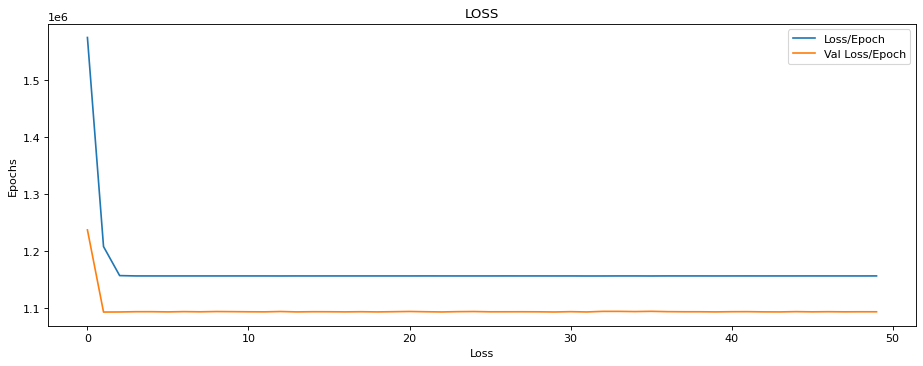

In [ ]:
#Grafico de loss
plt.figure(figsize=(14,5), dpi=80, facecolor='w', edgecolor='k')
plt.title("LOSS")
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.plot(model_his.history['loss'], label="Loss/Epoch")
plt.plot(model_his.history['val_loss'], label="Val Loss/Epoch")
plt.legend()
plt.show()

## Grafico de MAE

In [ ]:
# Normalizando MAE
model_his.history['mae'][-3:-1]

[910.7420654296875, 910.278076171875]

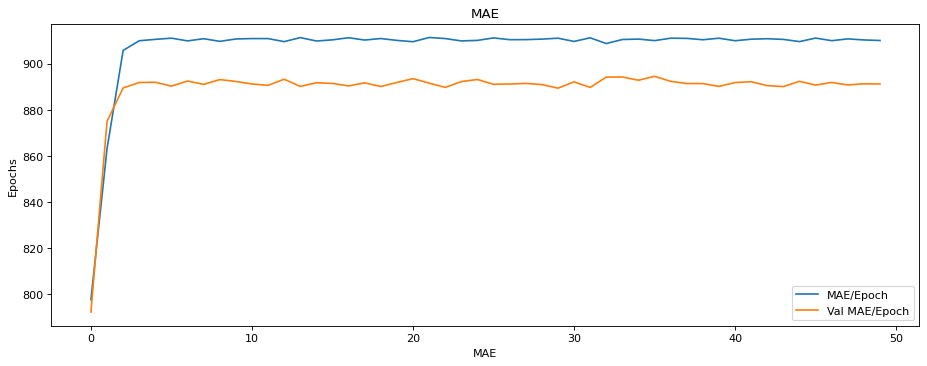

In [ ]:
#Grafico de MAE
plt.figure(figsize=(14,5), dpi=80, facecolor='w', edgecolor='k')
plt.title("MAE")
plt.xlabel("MAE")
plt.ylabel("Epochs")
plt.plot(model_his.history['mae'], label="MAE/Epoch")
plt.plot(model_his.history['val_mae'], label="Val MAE/Epoch")
plt.legend()
plt.show()

## Predição

In [ ]:
Yp = model_in.predict(X2)

In [ ]:
Yp

array([[789.7383],
       [789.7383],
       [789.7383],
       ...,
       [789.7383],
       [789.7383],
       [789.7382]], dtype=float32)

## MAPE

In [ ]:
# Implementar a regressão linear
actual = Y2
pred = Yp

def mean_absolute_percentage_error(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    actual = np.argmax(actual)
    pred = np.argmax(pred)
    if actual == 0.0 or pred == 0.0:
      return 'zero', np.mean(np.abs(actual - pred)) * 100
    else:
      return np.mean(np.abs((actual - pred) / actual)) * 100

mean_absolute_percentage_error(actual, pred)

('zero', 228800.0)

In [ ]:
# Utilizando MAPE
def mean_absolute_percentage_error(Y2, Yp):
    Y2, Yp = np.array(Y2), np.array(Yp)
    return np.mean(np.abs((Y2 - Yp) / Y2)) * 100

mean_absolute_percentage_error(Yp,Y2)

116.26516292290643